In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

1.Import the data from medical_examination.csv and assign it to the df variable.

In [2]:
df = pd.read_csv('medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


2. Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [3]:
df['bmi'] = df['weight']/((df['height']/100)**2)
def categorize_bmi(bmi_val):
    if bmi_val > 25:
        return 1
    else:
        return 0

df['overweight'] = df['bmi'].apply(categorize_bmi)
df


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,1


3.Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.

In [4]:
def normalize_cholesterol_glucose(val):
    if val > 1:
        return 1
    else:
        return 0
''' cholesterol_norm = df['cholesterol'].apply(normalize_cholesterol_glucose)
glucose_norm = df['gluc'].apply(normalize_cholesterol_glucose)
df.insert(7,'cholesterol_norm',cholesterol_norm)
'''
df['cholesterol'] = df['cholesterol'].apply(normalize_cholesterol_glucose)
df['gluc'] = df['gluc'].apply(normalize_cholesterol_glucose)

In [5]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


4. Draw the Categorical Plot in the draw_cat_plot function.
5. Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.

In [6]:
df_to_cat = df[["active","alco","cardio","cholesterol","gluc","overweight","smoke"]]
df_to_cat

,active,alco,cardio,cholesterol,gluc,overweight,smoke
0,1,0,0,0,0,0,0
1,1,0,1,1,0,1,0
2,0,0,1,1,0,0,0
3,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69995,1,0,0,0,0,1,1
69996,1,0,1,1,1,1,0
69997,0,1,1,1,0,1,0
69998,0,0,1,0,1,1,0


In [7]:
df_cat = pd.melt(df_to_cat,id_vars=['cardio'])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [8]:
df_cat_test = df_cat.groupby(['cardio','variable','value'],as_index=False).size().rename(columns={'size':'total'})
df_cat_test

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


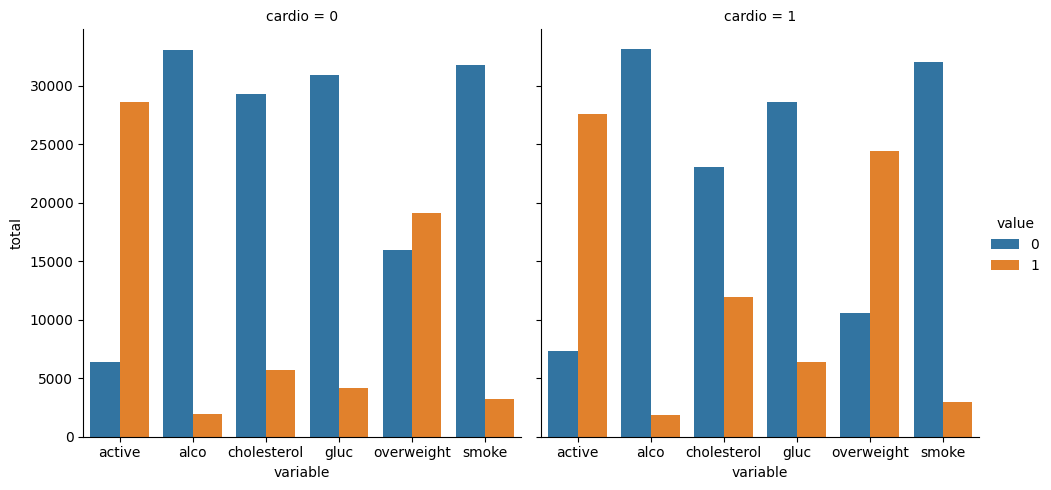

In [9]:
fig = sns.catplot(df_cat_test,x='variable',y='total',hue='value',col='cardio',kind='bar')
fig

Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
<li>diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))</li>
<li>height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))</li>
<li>height is more than the 97.5th percentile</li>
<li>weight is less than the 2.5th percentile</li>
<li>weight is more than the 97.5th percentile</li>

In [10]:
'''diastolic_check = df['ap_lo'] <= df['ap_hi']
diastolic_test=df.insert(7,'diastolic_check',diastolic_check)
df'''

"diastolic_check = df['ap_lo'] <= df['ap_hi']\ndiastolic_test=df.insert(7,'diastolic_check',diastolic_check)\ndf"

In [11]:
'''height_check = (df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975))
height_check = df.insert(4,'height_check',height_check)
df'''

"height_check = (df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975))\nheight_check = df.insert(4,'height_check',height_check)\ndf"

In [12]:
'''weight_check = (df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))
weight_check = df.insert(6,'weight_check',weight_check)
df'''

"weight_check = (df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))\nweight_check = df.insert(6,'weight_check',weight_check)\ndf"

In [13]:
df=df.drop(columns={'bmi'},axis=1)

test= df[((df['ap_lo'] <= df['ap_hi'])&(df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975))&(df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975)))==True]
test

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [25]:
corr=test.corr().round(2)
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.01,0.00,-0.00
age,0.00,1.00,-0.02,-0.08,0.07,0.02,0.15,0.13,0.09,-0.04,-0.03,-0.01,0.24,0.09
sex,0.00,-0.02,1.00,0.51,0.13,0.01,0.06,-0.04,-0.02,0.34,0.17,0.01,0.00,-0.05
height,0.00,-0.08,0.51,1.00,0.25,0.00,0.02,-0.06,-0.03,0.19,0.09,-0.01,-0.02,-0.15
weight,0.00,0.07,0.13,0.25,1.00,0.03,0.23,0.14,0.11,0.06,0.06,-0.01,0.17,0.66
ap_hi,0.00,0.02,0.01,0.00,0.03,1.00,0.07,0.02,0.01,-0.00,0.00,-0.00,0.05,0.02
ap_lo,0.00,0.15,0.06,0.02,0.23,0.07,1.00,0.15,0.07,0.02,0.03,0.00,0.33,0.17
cholesterol,0.00,0.13,-0.04,-0.06,0.14,0.02,0.15,1.00,0.38,0.01,0.04,0.00,0.20,0.13
gluc,0.00,0.09,-0.02,-0.03,0.11,0.01,0.07,0.38,1.00,-0.00,0.01,-0.01,0.09,0.09
smoke,-0.00,-0.04,0.34,0.19,0.06,-0.00,0.02,0.01,-0.00,1.00,0.34,0.03,-0.02,-0.00


<Axes: >

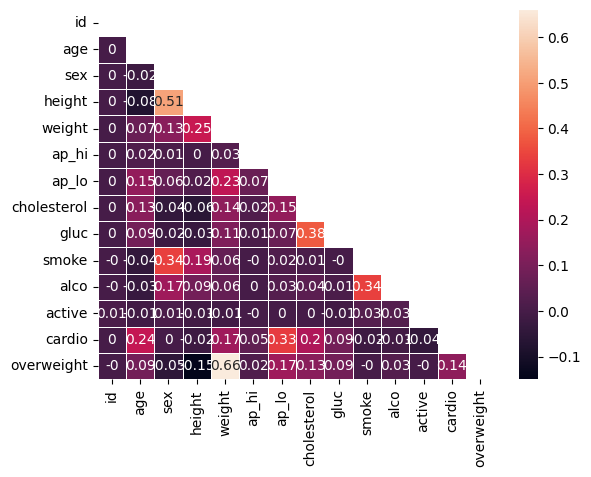

In [32]:
mask=np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, linewidths=.5)